## Задача 
-- выяснить, от каких самых малоприбыльных рейсов из Анапы мы можем отказаться в зимнее время. 

Исходя из того, что `прибыльность рейса` — это `разница между доходом от продаж билетов и расходом на полет`, соберите такой датасет, который позволит оценить эти цифры. 

Самая простая модель оценки прибыльности: `стоимость билетов - стоимость топлива на рейс` (для оценки последнего вам необходим километраж рейса или длительность полета), но вы можете предложить другую модель.

Ваш датасет должен обязательно включать `id рейса` и `города вылета (Анапа)` и `прилета`. Он также  может включать такие данные, как модель самолёта и его характеристики, суммарную стоимость всех билетов на рейсе, затраченное время в полёте и прочее — на ваше усмотрение.


#### Ссылка на презентацию
https://docs.google.com/presentation/d/1v0Ngv6YXOAiEjAF0i06hHsEhq6uJArtOxhDvB4fG74Y/edit#slide=id.gb928f704d7_0_129

In [17]:
import pandas as pd
from datetime import datetime, timedelta

from jupyterthemes import jtplot
jtplot.style()

In [2]:
flights = pd.read_csv('flights.csv')

In [3]:
display(flights.head(20))
flights.info()

,id,flight,from_airport,to_airport,departure,arrival,duration,aircraft,capacity,from_city,to_city,lt,lg,timezone,revenue
0,136119,PG0252,AAQ,SVO,2017-01-03T10:08:00Z,2017-01-03T11:49:00Z,1.683333,Boeing 737-300,130,Anapa,Moscow,55.972599,37.4146,Europe/Moscow,1653000.0
1,136120,PG0252,AAQ,SVO,2017-02-24T10:07:00Z,2017-02-24T11:46:00Z,1.650000,Boeing 737-300,130,Anapa,Moscow,55.972599,37.4146,Europe/Moscow,1605400.0
2,136122,PG0252,AAQ,SVO,2017-01-08T10:08:00Z,2017-01-08T11:48:00Z,1.666667,Boeing 737-300,130,Anapa,Moscow,55.972599,37.4146,Europe/Moscow,1431000.0
3,136130,PG0252,AAQ,SVO,2017-02-13T10:07:00Z,2017-02-13T11:46:00Z,1.650000,Boeing 737-300,130,Anapa,Moscow,55.972599,37.4146,Europe/Moscow,1556600.0
4,136131,PG0252,AAQ,SVO,2017-01-28T10:07:00Z,2017-01-28T11:46:00Z,1.650000,Boeing 737-300,130,Anapa,Moscow,55.972599,37.4146,Europe/Moscow,1812800.0
5,136132,PG0252,AAQ,SVO,2017-02-15T10:09:00Z,2017-02-15T11:48:00Z,1.650000,Boeing 737-300,130,Anapa,Moscow,55.972599,37.4146,Europe/Moscow,1714000.0
6,136135,PG0252,AAQ,SVO,2017-02-01T10:08:00Z,2017-02-01T11:48:00Z,1.666667,Boeing 737-300,130,Anapa,Moscow,55.972599,37.4146,Europe/Moscow,1678600.0
7,136146,PG0252,AAQ,SVO,2017-02-09T10:08:00Z,2017-02-09T11:48:00Z,1.666667,Boeing 737-300,130,Anapa,Moscow,55.972599,37.4146,Europe/Moscow,1604200.0
8,136159,PG0252,AAQ,SVO,2017-01-04T10:07:00Z,2017-01-04T11:45:00Z,1.633333,Boeing 737-300,130,Anapa,Moscow,55.972599,37.4146,Europe/Moscow,1700600.0
9,136164,PG0252,AAQ,SVO,2017-01-07T10:07:00Z,2017-01-07T11:46:00Z,1.650000,Boeing 737-300,130,Anapa,Moscow,55.972599,37.4146,Europe/Moscow,1738400.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127 entries, 0 to 126
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            127 non-null    int64  
 1   flight        127 non-null    object 
 2   from_airport  127 non-null    object 
 3   to_airport    127 non-null    object 
 4   departure     127 non-null    object 
 5   arrival       127 non-null    object 
 6   duration      127 non-null    float64
 7   aircraft      127 non-null    object 
 8   capacity      127 non-null    int64  
 9   from_city     127 non-null    object 
 10  to_city       127 non-null    object 
 11  lt            127 non-null    float64
 12  lg            127 non-null    float64
 13  timezone      127 non-null    object 
 14  revenue       118 non-null    float64
dtypes: float64(4), int64(2), object(9)
memory usage: 15.0+ KB


In [4]:
pd.DataFrame(flights.aircraft.value_counts())

,aircraft
Boeing 737-300,68
Sukhoi Superjet-100,59


In [5]:
pd.DataFrame(flights.to_airport.value_counts())

,to_airport
EGO,59
SVO,59
NOZ,9


В датасете всего две модели самолета:

- Boeing 737-300 - часовой расход топлива 2600 кг
- Sukhoi Superjet-100 - часовой расход топлива 1700 кг

Стоимость топлива в Анапе в 2017 году (за тонну):
- январь 41435 р
- февраль 39553 р
- декабрь 47101 р

In [6]:
# добавим столбец fuel_rate с расходом топлива самолета в тоннах в час
flights.loc[(flights['aircraft'] == 'Boeing 737-300'), 'fuel'] = 2.6
flights.loc[(flights['aircraft'] == 'Sukhoi Superjet-100'), 'fuel'] = 1.7

In [7]:
# добавим столбец fuel_price с ценой топлива в месяц вылета
flights.loc[(flights['departure'].str.find('2017-01') != -1), 'fuel_price'] = 41435
flights.loc[(flights['departure'].str.find('2017-02') != -1), 'fuel_price'] = 39553
flights.loc[(flights['departure'].str.find('2017-12') != -1), 'fuel_price'] = 47101

## Выручка PG0194

Данных о продажах на этот рейс нет, но на нём летает Boeing 737-300, попробуем предсказать revenue исходя из этого, используем данные о Москве. 

In [8]:
avg_revenue_boeing = flights[flights['to_airport'] == 'SVO']['revenue'].mean()
flights.loc[(flights['flight'] == 'PG0194'), 'revenue'] = avg_revenue_boeing

## Рассчёт прибыльности

In [9]:
# стоимость каждого перелёта
flights['cost'] = flights['fuel_price'] * flights['fuel'] * flights['duration']

In [10]:
flights['profit'] = flights['revenue'] - flights['cost']

count    1.270000e+02
mean     1.063101e+06
std      4.067017e+05
min      4.734744e+05
25%      6.915965e+05
50%      1.100330e+06
75%      1.435683e+06
max      1.706448e+06
Name: profit, dtype: float64

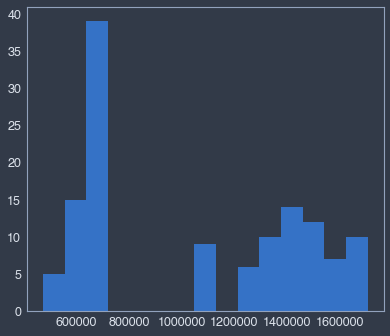

In [34]:
flights['profit'].hist(grid = False, bins = 15)
flights['profit'].describe()

In [43]:
# На гистограмме можно увидеть небольшое количество рейсов, имеющих наименьшую прибыльность
flights[flights['profit'] < 555000]

,id,flight,from_airport,to_airport,departure,arrival,duration,aircraft,capacity,from_city,to_city,lt,lg,timezone,revenue,fuel,fuel_price,cost,profit
77,136642,PG0480,AAQ,EGO,2017-01-30T09:28:00Z,2017-01-30T10:17:00Z,0.816667,Sukhoi Superjet-100,97,Anapa,Belgorod,50.643799,36.590099,Europe/Moscow,531000.0,1.7,41435.0,57525.591667,473474.408333
102,136807,PG0480,AAQ,EGO,2017-02-23T09:28:00Z,2017-02-23T10:18:00Z,0.833333,Sukhoi Superjet-100,97,Anapa,Belgorod,50.643799,36.590099,Europe/Moscow,531000.0,1.7,39553.0,56033.416667,474966.583333
109,136844,PG0480,AAQ,EGO,2017-02-28T09:26:00Z,2017-02-28T10:16:00Z,0.833333,Sukhoi Superjet-100,97,Anapa,Belgorod,50.643799,36.590099,Europe/Moscow,575100.0,1.7,39553.0,56033.416667,519066.583333
116,136887,PG0480,AAQ,EGO,2017-01-20T09:30:00Z,2017-01-20T10:19:00Z,0.816667,Sukhoi Superjet-100,97,Anapa,Belgorod,50.643799,36.590099,Europe/Moscow,595200.0,1.7,41435.0,57525.591667,537674.408333
120,136922,PG0480,AAQ,EGO,2017-02-11T09:27:00Z,2017-02-11T10:17:00Z,0.833333,Sukhoi Superjet-100,97,Anapa,Belgorod,50.643799,36.590099,Europe/Moscow,607800.0,1.7,39553.0,56033.416667,551766.583333


## Исключаемые рейсы
ID рейсов, которые я бы предложила исключить: 136642, 136807, 136844, 136887, 136922